In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  #'3,2' #'3,2,1,0'

from common import *
from utility.file   import *
from dataset.reader import *
from net.rate   import *
from net.metric import *
from train_u_net import *

import matplotlib.pyplot as plt
import os
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
set_name = os.path.join(ROOT_DIR, 'filenames/%s_train.csv' % (split))

cfg = Configuration()
net = Net(cfg).cuda()
optimizer = optim.SGD(net.parameters(), lr=0.01)

batch_size = 8
train_dataset = ScienceDataset(DATA_DIR, set_name, transform=train_augment, mode='train')
train_loader  = DataLoader(
                    train_dataset,
                    sampler = RandomSampler(train_dataset),
                    #sampler = ConstantSampler(train_dataset,list(range(16))),
                    batch_size  = batch_size,
                    drop_last   = False,
                    num_workers = 4,
                    pin_memory  = True,
                    collate_fn  = train_collate)

set_name = os.path.join(ROOT_DIR, 'filenames/%s_val.csv' % (split))
valid_dataset = ScienceDataset(DATA_DIR, set_name, transform=valid_augment, mode='train')
valid_loader  = DataLoader(
                    valid_dataset,
                    sampler     = SequentialSampler(valid_dataset),
                    batch_size  = batch_size,
                    drop_last   = False,
                    num_workers = 4,
                    pin_memory  = True,
                    collate_fn  = train_collate)


    

/home/htang6/workspace/tennis_det/filenames/tennis_train.csv
/home/htang6/workspace/tennis_det/filenames/tennis_val.csv


In [13]:
for epoch in range(10):
    net.train()
    for i,(inputs, truth_foregrounds, foreground_weights, truth_borders, images, truth_masks, indices) in enumerate(train_loader):
    #     print(images[0].shape)
    #     plt.imshow(images[0])
    #     plt.show()
    #     mask = truth_foregrounds[0].numpy()
    #     plt.imshow(mask)
    #     plt.colorbar()
    #     plt.show()
    #     print(mask)

        inputs = Variable(inputs).cuda()
        truth_foregrounds = Variable(truth_foregrounds).cuda()
        net(inputs)
        net.criterion(truth_foregrounds)
        print(net.loss)
        net.loss.backward()
        optimizer.step()

/home/htang6/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1762: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


tensor(0.1051, device='cuda:0')
tensor(0.1191, device='cuda:0')
tensor(1.00000e-02 *
       8.5427, device='cuda:0')
tensor(1.00000e-02 *
       7.6347, device='cuda:0')
tensor(0.1135, device='cuda:0')
tensor(0.1079, device='cuda:0')
tensor(1.00000e-02 *
       9.6657, device='cuda:0')
tensor(0.2344, device='cuda:0')
tensor(0.1389, device='cuda:0')
tensor(0.2121, device='cuda:0')


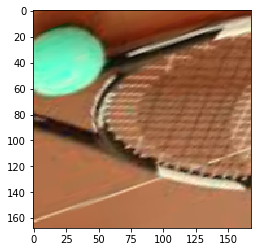

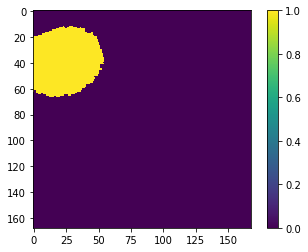

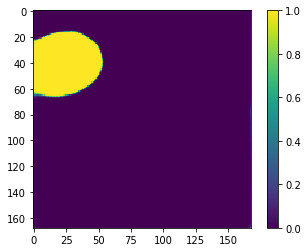

In [17]:
id = 3
plt.imshow(images[id])
plt.show()
mask = truth_foregrounds[id].cpu().numpy()
plt.imshow(mask)
plt.colorbar()
plt.show()

pred = F.sigmoid(net.foregrounds[id])
pred = pred.cpu().detach().numpy()
plt.imshow(pred[0])
plt.colorbar()

## Test

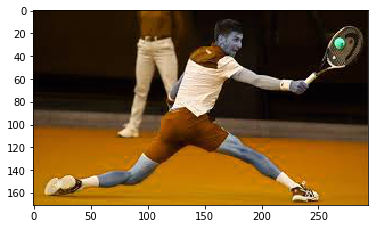

/home/htang6/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1762: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


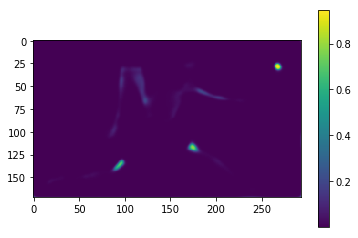

In [29]:
datadir = '/home/htang6/workspace/data/tennis/'
img = img = cv2.imread(os.path.join(datadir, 'test', 'images (4).jpg'))
plt.imshow(img)
plt.show()

input = torch.from_numpy(img.transpose((2,0,1))).float().div(255) - 0.5
input = Variable(input.unsqueeze(0)).cuda()
net.eval()
net(input)
pred = F.sigmoid(net.foregrounds[0])
pred = pred.cpu().detach().numpy()
plt.imshow(pred[0])
plt.colorbar()

In [ ]:
datadir = '/home/htang6/workspace/data/tennis/'
id = '4.png'
print(os.listdir(datadir))
img = cv2.imread(os.path.join(datadir, 'image', id))
mask = cv2.imread(os.path.join(datadir, 'mask', id))
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

plt.imshow(mask)
plt.show()

print(img.mean(), img.max(), img.min())

In [ ]:
mask.shape